In [2]:
import pandas as pd

# Load the dataset
data_path = 'cleanedDataGoal7.csv'
data = pd.read_csv(data_path)

# Display the first few rows and the structure of the dataset
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 5   Electricity from fossil fuels (TWh)                               3649 non-null   float64
 6   Electricity from nuclear (TWh)                                    3649 non-null   float64
 7   Electricity from renewables (TWh)

(        Entity  Year  Access to electricity (% of population)  \
 0  Afghanistan  2000                                 1.613591   
 1  Afghanistan  2001                                 4.074574   
 2  Afghanistan  2002                                 9.409158   
 3  Afghanistan  2003                                14.738506   
 4  Afghanistan  2004                                20.064968   
 
    Access to clean fuels for cooking  \
 0                                6.2   
 1                                7.2   
 2                                8.2   
 3                                9.5   
 4                               10.9   
 
    Renewable energy share in the total final energy consumption (%)  \
 0                                              44.99                  
 1                                              45.60                  
 2                                              37.83                  
 3                                              36.66             

In [3]:
# Filter the data for Afghanistan and sort by year
afghanistan_data = data[data['Entity'] == 'Afghanistan'].sort_values(by='Year')

# Check the specific trend for access to electricity
afghanistan_data[['Year', 'Access to electricity (% of population)']]


,Year,Access to electricity (% of population)
0,2000,1.613591
1,2001,4.074574
2,2002,9.409158
3,2003,14.738506
4,2004,20.064968
5,2005,25.390894
6,2006,30.718690
7,2007,36.051010
8,2008,42.400000
9,2009,46.740050


In [4]:
# Check for missing values in the Afghanistan dataset
afghanistan_data.isnull().sum()


Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
ValueCo2EmissionsKtByCountry                                        0
GdpGrowth                                                           0
GdpPerCapita                                                        0
Density_per_n(P/Km2)

In [6]:
afghanistan_data.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'ValueCo2EmissionsKtByCountry', 'GdpGrowth', 'GdpPerCapita',
       'Density_per_n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [23]:
import statsmodels.api as sm

# Define the independent variables
X = afghanistan_data[['GdpPerCapita', 'Renewable energy share in the total final energy consumption (%)', 
                      'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)',
                      'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                      'GdpGrowth']]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Define the dependent variable
y = afghanistan_data['Access to electricity (% of population)']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression results summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Access to electricity (% of population)   R-squared:                       0.914
Model:                                                 OLS   Adj. R-squared:                  0.868
Method:                                      Least Squares   F-statistic:                     19.75
Date:                                     Wed, 01 May 2024   Prob (F-statistic):           5.69e-06
Time:                                             23:20:13   Log-Likelihood:                -77.717
No. Observations:                                       21   AIC:                             171.4
Df Residuals:                                           13   BIC:                             179.8
Df Model:                                                7                                         
Covariance Type:                                 nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -11.2367     48.321     -0.233      0.820    -115.629      93.155
GdpPerCapita                                                         0.0010      0.001      0.748      0.468      -0.002       0.004
Renewable energy share in the total final energy consumption (%)    -1.4780      1.011     -1.463      0.167      -3.661       0.705
Electricity from fossil fuels (TWh)                                 42.4233     61.316      0.692      0.501     -90.041     174.888
Electricity from renewables (TWh)                                  104.7280     20.780      5.040      0.000      59.837     149.619
Primary energy consumption per capita (kWh/person)                  -0.0305      0.024     -1.266      0.228      -0.083       0.022
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         18.6344      5.053      3.688      0.003       7.718      29.551
GdpGrowth                                                           -0.8085      0.565     -1.431      0.176      -2.029       0.412
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   2.459
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.184
Skew:                           0.187   Prob(JB):                        0.912
Kurtosis:                       2.733   Cond. No.                     9.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Calculate the correlation matrix for the relevant variables in the Afghanistan dataset
correlation_matrix = afghanistan_data[['Access to electricity (% of population)', 'GdpPerCapita', 
                                       'Renewable energy share in the total final energy consumption (%)', 
                                       'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)',
                                       'Primary energy consumption per capita (kWh/person)', 
                                       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
                                       'GdpGrowth']].corr()

correlation_matrix


,Access to electricity (% of population),GdpPerCapita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),GdpGrowth
Access to electricity (% of population),1.000000,-0.456922,-0.690455,-0.268148,0.846226,0.615938,0.609617,-0.264493
GdpPerCapita,-0.456922,1.000000,0.556541,-0.349504,-0.508569,-0.325814,-0.166349,-0.136946
Renewable energy share in the total final energy consumption (%),-0.690455,0.556541,1.000000,0.204741,-0.694527,-0.900735,-0.393074,-0.185394
Electricity from fossil fuels (TWh),-0.268148,-0.349504,0.204741,1.000000,-0.145736,-0.332224,-0.443194,0.171702
Electricity from renewables (TWh),0.846226,-0.508569,-0.694527,-0.145736,1.000000,0.529652,0.243175,-0.064000
Primary energy consumption per capita (kWh/person),0.615938,-0.325814,-0.900735,-0.332224,0.529652,1.000000,0.570138,0.084028
Energy intensity level of primary energy (MJ/$2017 PPP GDP),0.609617,-0.166349,-0.393074,-0.443194,0.243175,0.570138,1.000000,-0.296759
GdpGrowth,-0.264493,-0.136946,-0.185394,0.171702,-0.064000,0.084028,-0.296759,1.000000


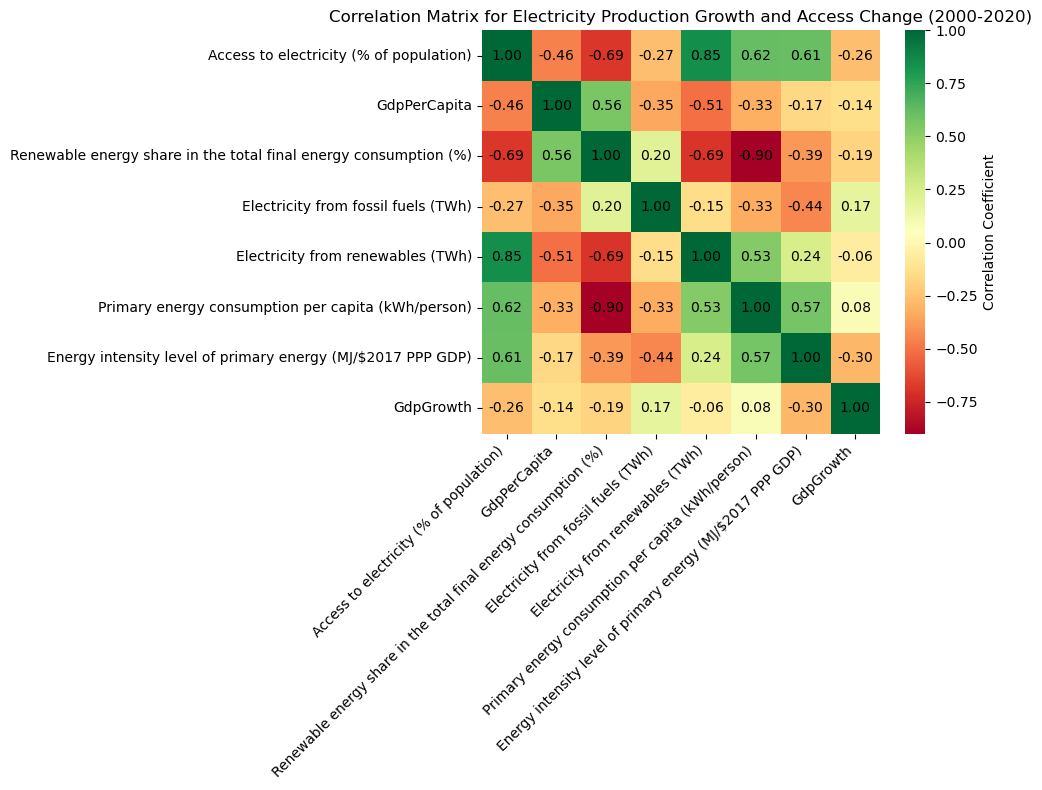

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming correlation_matrix is already defined and is a pandas DataFrame
# with the correlation values.

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap without annotations
sns.heatmap(correlation_matrix, fmt=".2f", cmap="RdYlGn", cbar_kws={'label': 'Correlation Coefficient'})

# Manually annotate each cell with the numeric value
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        score = correlation_matrix.iloc[j, i]
        plt.text(i+0.5, j+0.5, f"{score:.2f}",
                 fontsize=10, ha='center', va='center')

# Set the title and adjust layout
plt.title('Correlation Matrix for Electricity Production Growth and Access Change (2000-2020)')

# Rotate the tick labels for visibility
plt.xticks(ticks=np.arange(0.5, len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(0.5, len(correlation_matrix.index)), labels=correlation_matrix.index, rotation=0)

# Show the plot with tight_layout to adjust for space
plt.tight_layout()
plt.show()

In [12]:
# Filter the data for Afghanistan and sort by year
CAR_data = data[data['Entity'] == 'Central African Republic'].sort_values(by='Year')

# Check the specific trend for access to electricity
CAR_data[['Year', 'Access to electricity (% of population)']]


,Year,Access to electricity (% of population)
651,2000,6.000000
652,2001,5.736052
653,2002,6.177054
654,2003,6.612820
655,2004,7.045701
656,2005,7.478045
657,2006,7.805169
658,2007,8.350998
659,2008,7.480000
660,2009,9.252875


In [14]:
import statsmodels.api as sm

# Define the independent variables
X = CAR_data[['GdpPerCapita', 'Renewable energy share in the total final energy consumption (%)', 
                      'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)',
                      'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                      'GdpGrowth']]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Define the dependent variable
y = CAR_data['Access to electricity (% of population)']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression results summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Access to electricity (% of population)   R-squared:                       0.943
Model:                                                 OLS   Adj. R-squared:                  0.912
Method:                                      Least Squares   F-statistic:                     30.73
Date:                                     Wed, 01 May 2024   Prob (F-statistic):           4.21e-07
Time:                                             21:43:58   Log-Likelihood:                -23.751
No. Observations:                                       21   AIC:                             63.50
Df Residuals:                                           13   BIC:                             71.86
Df Model:                                                7                                         
Covariance Type:                                 nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -10.0595      7.152     -1.406      0.183     -25.511       5.392
GdpPerCapita                                                         0.0320      0.009      3.671      0.003       0.013       0.051
Renewable energy share in the total final energy consumption (%)    -0.1123      0.056     -2.004      0.066      -0.233       0.009
Electricity from fossil fuels (TWh)                                -76.7340     55.634     -1.379      0.191    -196.923      43.455
Electricity from renewables (TWh)                                   -3.9065     22.040     -0.177      0.862     -51.522      43.709
Primary energy consumption per capita (kWh/person)                   0.0166      0.010      1.594      0.135      -0.006       0.039
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          1.7728      1.041      1.702      0.112      -0.477       4.022
GdpGrowth                                                           -0.0077      0.039     -0.199      0.845      -0.092       0.076
==============================================================================
Omnibus:                       12.003   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.068
Skew:                          -1.332   Prob(JB):                      0.00651
Kurtosis:                       5.101   Cond. No.                     1.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

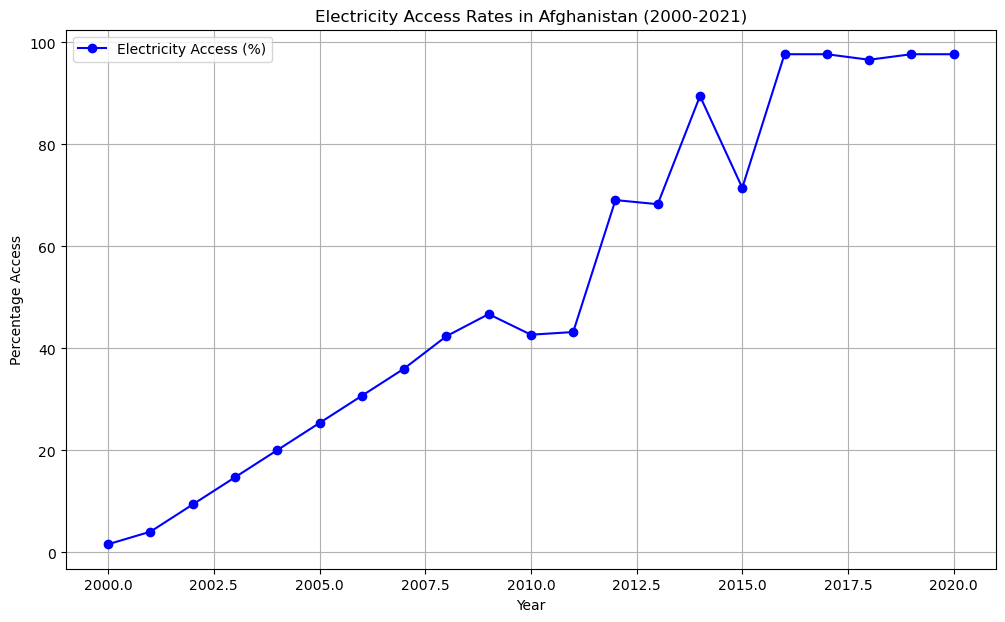

In [27]:
# Plotting
plt.figure(figsize=(12, 7))
plt.plot(afghanistan_data['Year'], afghanistan_data['Access to electricity (% of population)'], 'bo-', label='Electricity Access (%)')
plt.title('Electricity Access Rates in Afghanistan (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Percentage Access')
plt.grid(True)
plt.legend()
plt.show()
